In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

## **LOAD DATA TRAIN**

In [2]:
# import data train
data_train = pd.read_csv("https://github.com/rizkyfransisca/Tugas-Besar-Klasifikasi-Pembelajaran-Mesin/blob/main/kendaraan_train.csv?raw=true")
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## **DATA TRAIN EXPLORATION**

In [3]:
# show the first 5 data
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
# show rows and columns of the data train
baris, kolom = data_train.shape
print('Baris =', baris, ', Kolom =',kolom)

Baris = 285831 , Kolom = 12


### **Statistical Representation**

In [5]:
# Statistical Representation (numerical columns)
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,285831.0,142916.000000,82512.446734,1.0,71458.5,142916.0,214373.50,285831.0
Umur,271617.0,38.844336,15.522487,20.0,25.0,36.0,49.00,85.0
SIM,271427.0,0.997848,0.046335,0.0,1.0,1.0,1.00,1.0
Kode_Daerah,271525.0,26.405410,13.252714,0.0,15.0,28.0,35.00,52.0
Sudah_Asuransi,271602.0,0.458778,0.498299,0.0,0.0,0.0,1.00,1.0
Premi,271262.0,30536.683472,17155.000770,2630.0,24398.0,31646.0,39377.75,540165.0
Kanal_Penjualan,271532.0,112.021567,54.202457,1.0,29.0,132.0,152.00,163.0
Lama_Berlangganan,271839.0,154.286302,83.694910,10.0,82.0,154.0,227.00,299.0
Tertarik,285831.0,0.122471,0.327830,0.0,0.0,0.0,0.00,1.0


In [6]:
# Statistical Representation (categorical columns)
data_train.describe(include='object').transpose()

,count,unique,top,freq
Jenis_Kelamin,271391,2,Pria,146678
Umur_Kendaraan,271556,3,1-2 Tahun,142761
Kendaraan_Rusak,271643,2,Pernah,137123


### **Viewing Data Information (Column, Non-Null, Data Type)**

In [7]:
# Show Information about data -> column, non-null, data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [8]:
# Show the unique values that exist in each columns
for col in data_train.columns:
  if col == "id":
    continue
  print('-'*30 + " " + col +  " " +  '-'*30)
  print()
  print(data_train[col].unique())
  print()

------------------------------ Jenis_Kelamin ------------------------------

['Wanita' 'Pria' nan]

------------------------------ Umur ------------------------------

[30. 48. 21. 58. 50. 33. 23. 20. 54. 25. nan 66. 31. 24. 22. 52. 26. 46.
 41. 45. 29. 68. 73. 27. 34. 60. 44. 47. 75. 38. 35. 53. 71. 59. 57. 65.
 51. 39. 37. 28. 36. 67. 49. 42. 72. 69. 63. 40. 32. 76. 56. 43. 64. 55.
 61. 80. 78. 70. 74. 62. 77. 79. 82. 81. 85. 84. 83.]

------------------------------ SIM ------------------------------

[ 1. nan  0.]

------------------------------ Kode_Daerah ------------------------------

[33. 39. 46. 48. 35.  8. 28. 29. 14. 12. nan 24. 30. 15.  9. 11. 10. 34.
 16.  3. 36. 47. 49. 38. 43. 44.  6. 41. 37. 31. 26. 18. 13. 20. 45. 50.
 32.  2. 21.  7. 52. 17.  4.  0. 25. 23. 40.  5. 27. 19. 42.  1. 22. 51.]

------------------------------ Sudah_Asuransi ------------------------------

[ 1.  0. nan]

------------------------------ Umur_Kendaraan ------------------------------

['< 1 Tah

In [9]:
# View the number of each value in each columns
for col in data_train.columns:
  if col == "id":
    continue
  print('-'*30 + " " + col +  " " +  '-'*30)
  print(data_train[col].value_counts())

------------------------------ Jenis_Kelamin ------------------------------
Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64
------------------------------ Umur ------------------------------
24.0    18443
23.0    17403
22.0    14975
25.0    14634
21.0    11652
        ...  
81.0       42
82.0       20
83.0       16
84.0        9
85.0        8
Name: Umur, Length: 66, dtype: int64
------------------------------ SIM ------------------------------
1.0    270843
0.0       584
Name: SIM, dtype: int64
------------------------------ Kode_Daerah ------------------------------
28.0    75439
8.0     24186
46.0    14157
41.0    12931
15.0     9500
30.0     8630
29.0     7931
50.0     7349
3.0      6594
11.0     6548
36.0     6285
33.0     5459
47.0     5371
35.0     4963
6.0      4489
45.0     4009
37.0     3917
18.0     3662
48.0     3386
39.0     3384
14.0     3310
10.0     3049
21.0     3019
2.0      2961
13.0     2875
7.0      2323
12.0     2281
9.0      2213
27.0     2023


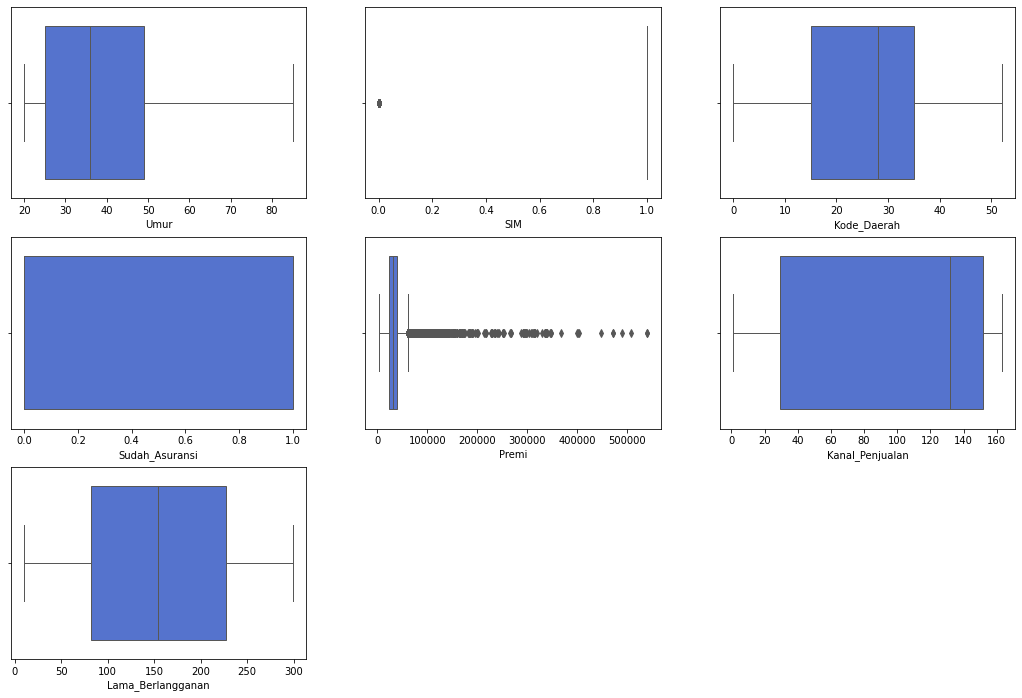

In [10]:
# check outliers for each columns, except column "id", "Tertarik", and column which has object data type
plt.figure(figsize=(18,12))
i = 1
for col in data_train.columns:
  if data_train[col].dtypes == 'object' or col == "id" or col == "Tertarik":
    continue
  plt.subplot(3,3,i)
  sns.boxplot(data=data_train, x=col, color='royalblue', linewidth=1)
  i+=1
plt.show()

### **Drop Column "id"**

In [11]:
# Drop column "id", with the reason later will check duplicate data
data_train = data_train.drop("id",axis=1)

In [12]:
# show first 5 data
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [13]:
# show the number of rows and columns of data train
baris, kolom = data_train.shape
print('Baris =', baris, ', Kolom =',kolom)

Baris = 285831 , Kolom = 11


### **Check Duplicate Data**

In [14]:
# check duplicate data on data train
print("Banyaknya data yang duplicate =", data_train.duplicated().sum())
duplicated_data = data_train[data_train.duplicated()]
duplicated_data

Banyaknya data yang duplicate = 169


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
24277,Pria,21.0,1.0,14.0,1.0,< 1 Tahun,Tidak,2630.0,160.0,202.0,0
38835,Wanita,23.0,1.0,41.0,1.0,< 1 Tahun,Tidak,NaN,152.0,NaN,0
40755,Wanita,69.0,1.0,1.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,22.0,0
43123,Wanita,53.0,1.0,28.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,143.0,0
43855,Pria,53.0,1.0,28.0,0.0,1-2 Tahun,Pernah,NaN,124.0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...
279025,Wanita,26.0,1.0,15.0,0.0,< 1 Tahun,Tidak,NaN,152.0,236.0,0
279714,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,2630.0,160.0,NaN,0
281991,Pria,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,NaN,0
282117,Pria,40.0,1.0,48.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,152.0,0


### **Viewing The Sum and Percentage of Missing Values For Each Columns**

In [15]:
# Sum of missing values for each columns
arr_sum_miss_val = data_train.isna().sum().values
# Percantage of missing values for each columns
arr_perc_miss_val = (data_train.isna().sum() / len(data_train) * 100).values
# Show sum and percantage of missing values for each columns
miss_val_df = pd.DataFrame(data={"Sum Missing Values" : arr_sum_miss_val, "Percentage Missing Values(%)" : arr_perc_miss_val}, index=data_train.columns)
miss_val_df

,Sum Missing Values,Percentage Missing Values(%)
Jenis_Kelamin,14440,5.051936
Umur,14214,4.972869
SIM,14404,5.039341
Kode_Daerah,14306,5.005055
Sudah_Asuransi,14229,4.978116
Umur_Kendaraan,14275,4.994210
Kendaraan_Rusak,14188,4.963772
Premi,14569,5.097068
Kanal_Penjualan,14299,5.002606
Lama_Berlangganan,13992,4.895200


### **Check the distribution of missing values**

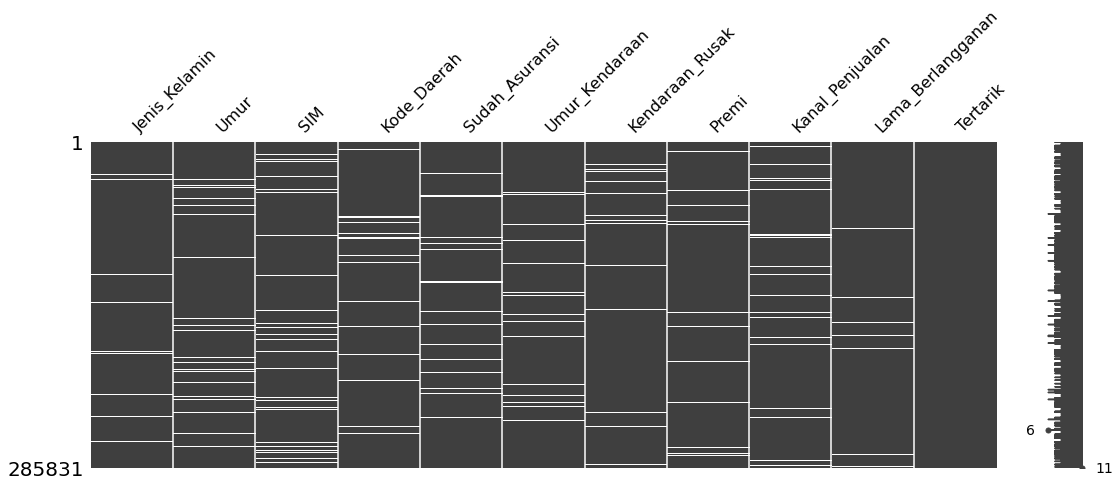

In [16]:
# check the distribution of missing values in each rows and columns in the data train
mno.matrix(data_train, figsize=(18,6))
plt.show()

### **Check Normal Distribution and Skewness**

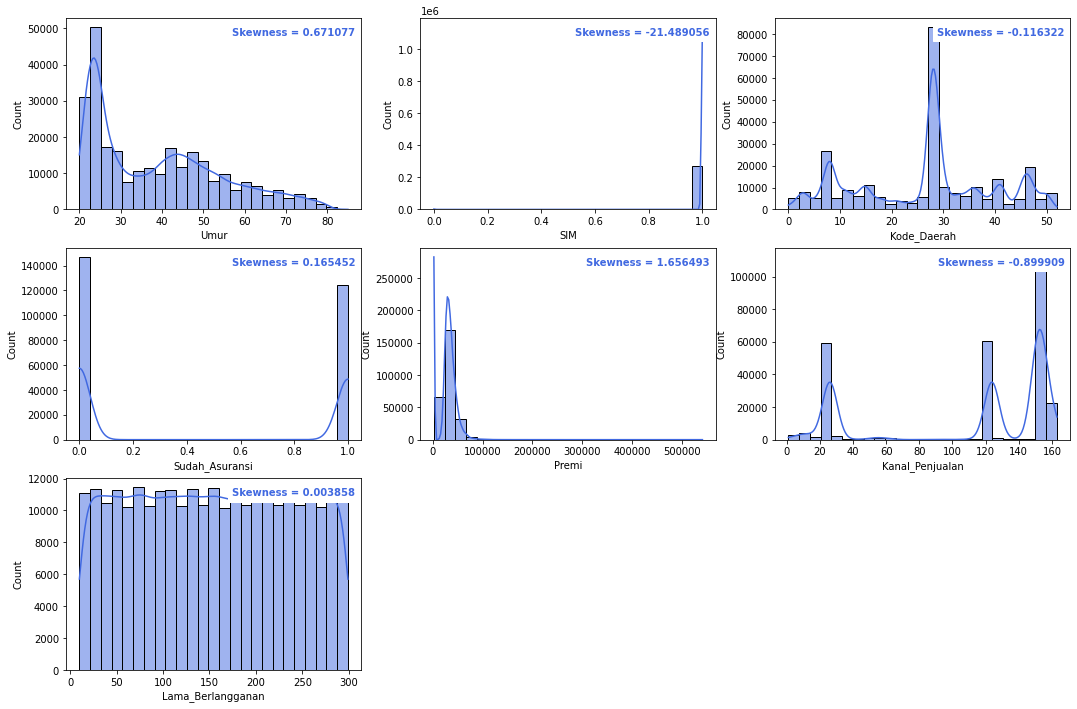

In [17]:
# check the normal distribution and skewness of each column, for consideration in handling missing values
plt.figure(figsize=(18,12))
i = 1
for col in data_train.columns:
  if data_train[col].dtypes == 'object' or col == "Tertarik":
    continue
  ax = plt.subplot(3,3,i)
  plt.text(x=0.98, y=0.95,s="Skewness = %f"%data_train[col].skew(), transform=ax.transAxes,verticalalignment='top', horizontalalignment='right',backgroundcolor='white', color='royalblue',fontweight=600, fontsize=10)
  sns.histplot(data_train[col], kde=True, color='royalblue',bins=25)
  i+=1
plt.show()

### **Check Correlation**

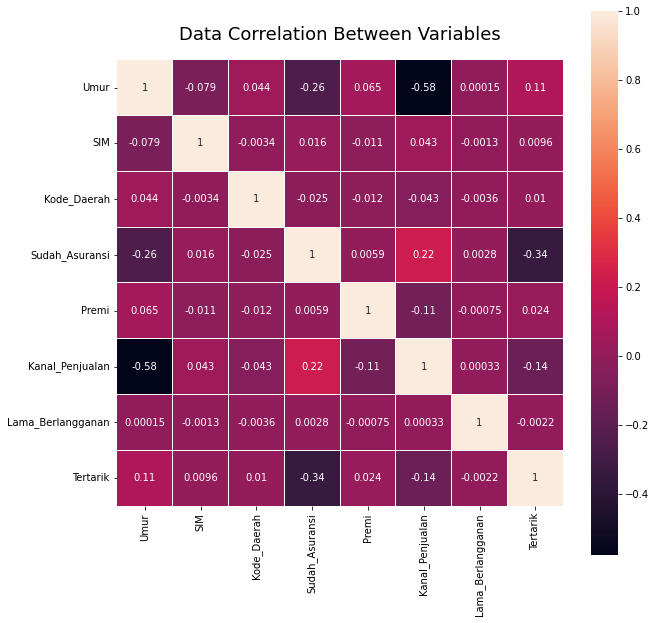

In [18]:
# Plot the correlation for all numerical data type columns using heatmap
correlation = data_train.corr()
plt.figure(figsize=(10,10))
plt.title("Data Correlation Between Variables", fontsize=18, pad=20)
sns.heatmap(correlation, annot=True, linewidths=0.01, square=True,annot_kws={"fontsize":10})
plt.show()

### **Check The Proportion of Each Value in Target/Label Class ("Tertarik" Column)**

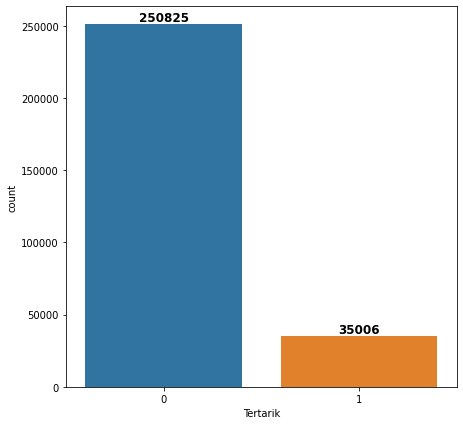

In [19]:
plt.figure(figsize=(7,7))
plots = sns.countplot(x="Tertarik", data=data_train)

rects = plots.patches
labels = [data_train["Tertarik"].value_counts()[0], data_train["Tertarik"].value_counts()[1]]
for rect, label in zip(rects, labels):
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width() / 2, height, label,ha='center', va='bottom',fontweight=600, fontsize=12)

plt.show()

## **LOAD DATA TEST**

# DATASET TEST EXPLORATION

##**Read Dataset**

In [20]:
data_test = pd.read_csv("https://github.com/rizkyfransisca/Tugas-Besar-Klasifikasi-Pembelajaran-Mesin/blob/main/kendaraan_test.csv?raw=true")
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


## **View The Head Of Data**

In [21]:
# Show the first 5 data
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## **View The Shape Of Data**

In [22]:
# show the shape of data (rows,columns)
data_test.shape

(47639, 11)

## **View The Type Of Data**

In [23]:
# Check the data type for each column
data_test.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

## **Check Missing Value**

In [24]:
# Check missing value for each columns
data_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Check Duplicated Data**

In [25]:
# Check duplicate data on data test
print(data_test.duplicated().sum())
duplicated_data = data_test[data_test.duplicated()]
duplicated_data

3


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
7859,Wanita,41,1,28,0,1-2 Tahun,Pernah,2630,124,257,0
11717,Wanita,35,1,30,1,1-2 Tahun,Tidak,2630,124,187,0
31113,Wanita,47,1,28,0,1-2 Tahun,Pernah,2630,26,276,1


## **Check Outlier**

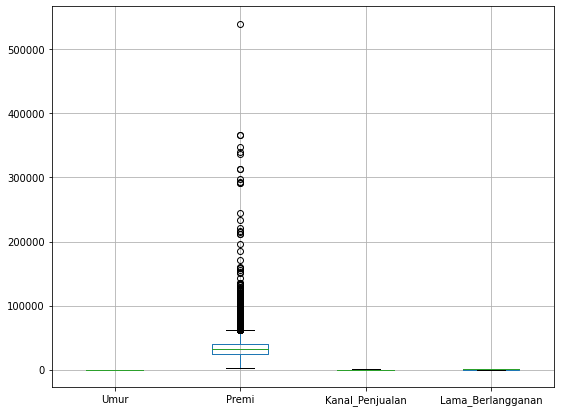

In [26]:
# Check outlier for columns "Umur", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"
plt.figure(figsize=(9,7))
boxplot = data_test.boxplot(column=['Umur', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'])